# Netflix Content Analysis

In this project, we perform an exploratory data analysis (EDA) on the Netflix dataset, identifying patterns in genres, countries, content types, and release years.

Libraries used: **Python, Pandas, NumPy, Matplotlib, Seaborn, Collections, os**.


In [4]:
# Importing Libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dtf
import os 
# Visual settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)



### Loading the Dataset


In [6]:
file_path = os.path.join("Netflix Dataset.csv")
df = pd.read_csv(file_path)

# Checking general info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Data Cleaning and Preprocessing

In [7]:
df.columns = df.columns.str.strip()

# Show_Id
df['Show_Id'] = df['Show_Id'].str[1:]
df['Show_Id'] = df['Show_Id'].astype('Float64')

# Release_Date
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip())
df['Release_Date'] = df['Release_Date'].interpolate()
df['Year'] = df['Release_Date'].dt.year.round(0).astype('Int32')

# Remover duplicados
df.drop_duplicates(subset=['Show_Id'], keep='first', inplace=True)


## Exploratory Analysis

### 4.1 Most Frequent Values by Column


In [9]:
cols = ['Director', 'Cast', 'Country', 'Rating', 'Type']
for column in cols:
    print(f"\nTop 5 valores em {column}:")
    print(df[column].value_counts().head())



Top 5 valores em Director:
Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Name: count, dtype: int64

Top 5 valores em Cast:
Cast
David Attenborough                                                                                                        18
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Name: count, dtype: int64

Top 5 valores em Country:
Country
United States     2555
India              923
United Kingdom     397
Japan   

### 4.2 Distribution of Releases by Year


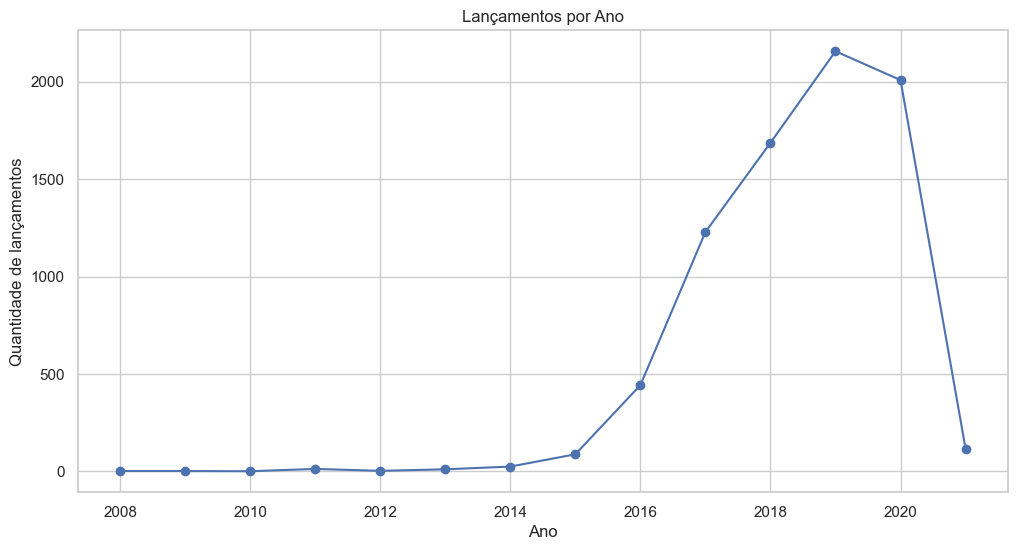

In [10]:
df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel("Ano")
plt.ylabel("Quantidade de lançamentos")
plt.title("Lançamentos por Ano")
plt.show()


### 4.3 Function to Get Top Genres


In [11]:
def get_top_genres(df, top_n=10):
    all_genres = []
    for genres_str in df['Type'].dropna():
        genres = [genre.strip() for genre in str(genres_str).split(',')]
        all_genres.extend(genres)
    
    genre_counts = Counter(all_genres)
    top_genres = genre_counts.most_common(top_n)
    
    return pd.DataFrame(top_genres, columns=['genre', 'count'])

top_genres = get_top_genres(df)


### 4.4 Top 10 Genres Bar Plot



C:\Users\ayuki\AppData\Local\Temp\ipykernel_17904\2956524241.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='count', y='genre', palette='magma')


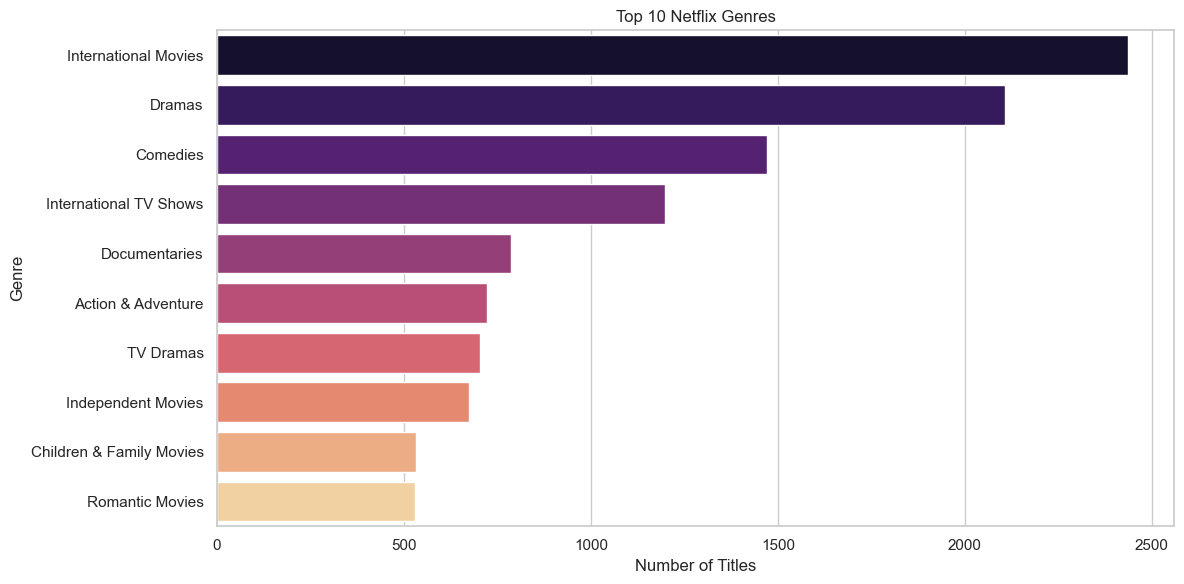

In [18]:
sns.barplot(data=top_genres, x='count', y='genre', palette='magma')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


### 4.5 Top Countries Analysis


C:\Users\ayuki\AppData\Local\Temp\ipykernel_17904\489403101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma', legend=False)


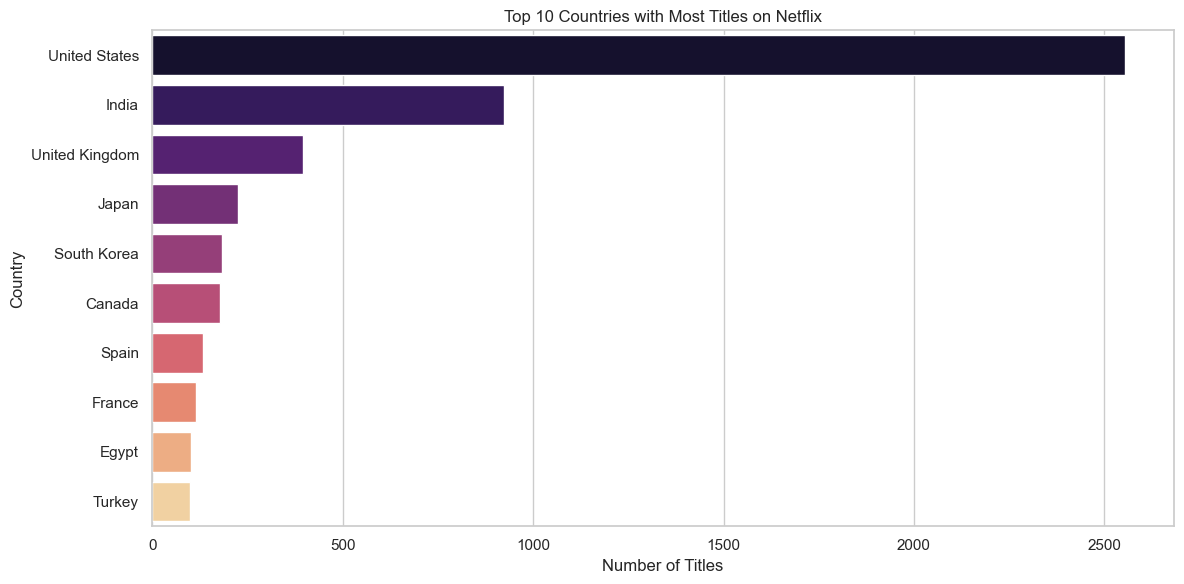

In [17]:
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## Conclusions

- We identified the most popular genres and countries producing Netflix content.  
- Visualized release trends over the years.  
- Demonstrated data cleaning, preprocessing, and exploratory data analysis in Python.
